This file performs the Machine Learning on the Movie Dataset

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                            recall_score, f1_score, log_loss, roc_curve, auc, roc_auc_score, RocCurveDisplay)
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import uniform
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier

In [9]:
# personal filepaths, data file too big for git
BRAD_TRAIN = r"C:\Users\Brady\Documents\School\DS4400\train_df.csv"
BRAD_TEST = r"C:\Users\Brady\Documents\School\DS4400\test_df.csv"
SARA_TRAIN = r'/Users/sarakent/Desktop/ML 1/train_df.csv'
SARA_TEST = r'/Users/sarakent/Desktop/ML 1/test_df.csv'

In [10]:
# read in dataframes

train_df = pd.read_csv(BRAD_TRAIN, index_col=[0])
test_df = pd.read_csv(BRAD_TEST, index_col=[0])
#train_df = pd.read_csv(SARA_TRAIN, index_col=[0])
#test_df = pd.read_csv(SARA_TEST, index_col=[0])

In [5]:
train_df.shape, test_df.shape

((9666, 18845), (3223, 18845))

In [6]:
train_df.head(1)

,genres,production_companies,release_date,a,aa,aalto,aaron,ab,abandon,abandoned,...,zoned,zoo,zoological,zoologist,zoom,zu,zucchini,zulu,zurich,zwingli
2709,Drama,21,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# split to X and y
X_train = train_df.iloc[:, 1:]
y_train = train_df["genres"]

X_test = test_df.iloc[:, 1:]
y_test = test_df["genres"]

In [8]:
X_train.head(1)

,production_companies,release_date,a,aa,aalto,aaron,ab,abandon,abandoned,abandoning,...,zoned,zoo,zoological,zoologist,zoom,zu,zucchini,zulu,zurich,zwingli
2709,21,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
word_counts = X_train.iloc[:, 2:].sum(axis=0)

# sort the columns based on their sums in descending order
sorted_cols = word_counts.sort_values(ascending=False)

# calculate the number of columns to keep (top 25%)
cols_to_keep = int(len(sorted_cols) * 0.25)

# select the top 25% columns
cols_to_keep = sorted_cols.head(cols_to_keep)

# filter to keep only the selected columns
X_train_filtered = X_train[cols_to_keep.index]
words = X_train_filtered.columns.tolist()

# filter dataframe
X_test_filtered = X_test[words]
other_feats_train = X_train.iloc[:, :2]
other_feats_test = X_test.iloc[:, :2]

# add back the other features to the df
X_train_filtered = pd.concat([other_feats_train, X_train_filtered], axis=1)
X_test_filtered = pd.concat([other_feats_test, X_test_filtered], axis=1)

print(X_train_filtered)
print(X_test_filtered)

       production_companies  release_date  life  one  find  world  love  new  \
2709                     21             2     0    0     0      0     0    0   
5024                     21             4     0    0     0      0     0    0   
5156                     21             1     0    0     1      0     1    1   
2675                     21             9     0    0     0      0     0    0   
1199                     21             5     0    0     0      0     0    0   
...                     ...           ...   ...  ...   ...    ...   ...  ...   
11964                    21            10     0    0     0      0     0    0   
5191                     21             8     0    0     0      0     1    0   
5390                      1             2     0    0     0      0     0    1   
860                       4             2     1    0     0      1     1    0   
7270                     21             4     0    0     1      0     0    0   

       man  young  ...  looked  resurre

In [14]:
label_encoder = LabelEncoder()

# fit and transform the targets
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [12]:
y_train_encoded

array([ 6,  0, 14, ...,  3,  8,  6])

## Random Forest

predictions made on: 100 estimators 25 max_depth
predictions made on: 200 estimators 25 max_depth
predictions made on: 300 estimators 25 max_depth
predictions made on: 400 estimators 25 max_depth
predictions made on: 100 estimators 50 max_depth
predictions made on: 200 estimators 50 max_depth
predictions made on: 300 estimators 50 max_depth
predictions made on: 400 estimators 50 max_depth
predictions made on: 100 estimators 100 max_depth
predictions made on: 200 estimators 100 max_depth
predictions made on: 300 estimators 100 max_depth
predictions made on: 400 estimators 100 max_depth
predictions made on: 100 estimators 150 max_depth
predictions made on: 200 estimators 150 max_depth
predictions made on: 300 estimators 150 max_depth
predictions made on: 400 estimators 150 max_depth


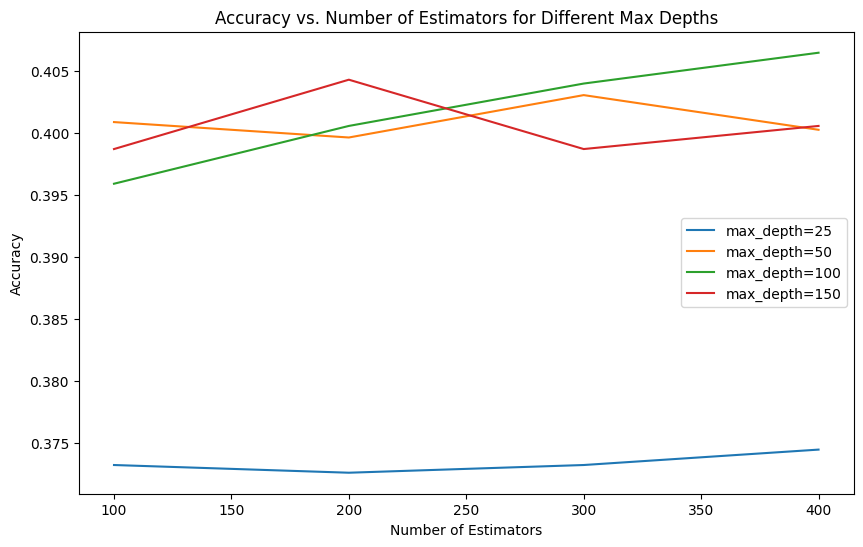

In [18]:
# testing max depths & number of estimators
max_depth_values = [25, 50, 100, 150]
n_estimators_values = [100, 200, 300, 400]

accuracy_scores = []

for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        # Random Forest classifier
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        
        # fit model
        rf.fit(X_train_filtered, y_train_encoded)
        
        # predict on the test data
        y_pred = rf.predict(X_test_filtered)
        
        # added a print statement to see what's running
        print('predictions made on:', n_estimators, 'estimators', max_depth, 'max_depth')
        
        # store accuracy
        accuracy = accuracy_score(y_test_encoded, y_pred)
        accuracy_scores.append((max_depth, n_estimators, accuracy))

# converting to numpy for easier graphing
accuracy_scores = np.array(accuracy_scores)

# results
plt.figure(figsize=(10, 6))
for max_depth in max_depth_values:
    mask = accuracy_scores[:, 0] == max_depth
    plt.plot(accuracy_scores[mask, 1], accuracy_scores[mask, 2], label=f"max_depth={max_depth}")

plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Estimators for Different Max Depths')
plt.legend()
plt.show()

In [19]:
# find the index of the highest accuracy score
best_index = np.argmax(accuracy_scores[:, 2])

# best max_depth and n_estimators values
best_max_depth = accuracy_scores[best_index, 0]
best_n_estimators = accuracy_scores[best_index, 1]

print("best max depth:", best_max_depth)
print("best number of estimators:", best_n_estimators)

best max depth: 100.0
best number of estimators: 400.0


test accuracy: 0.9898613697496379
accuracy: 0.40645361464474095
recall: 0.40645361464474095
precision: 0.5062225588352338
f1 score: 0.34434564986664606
error rate: 0.593546385355259


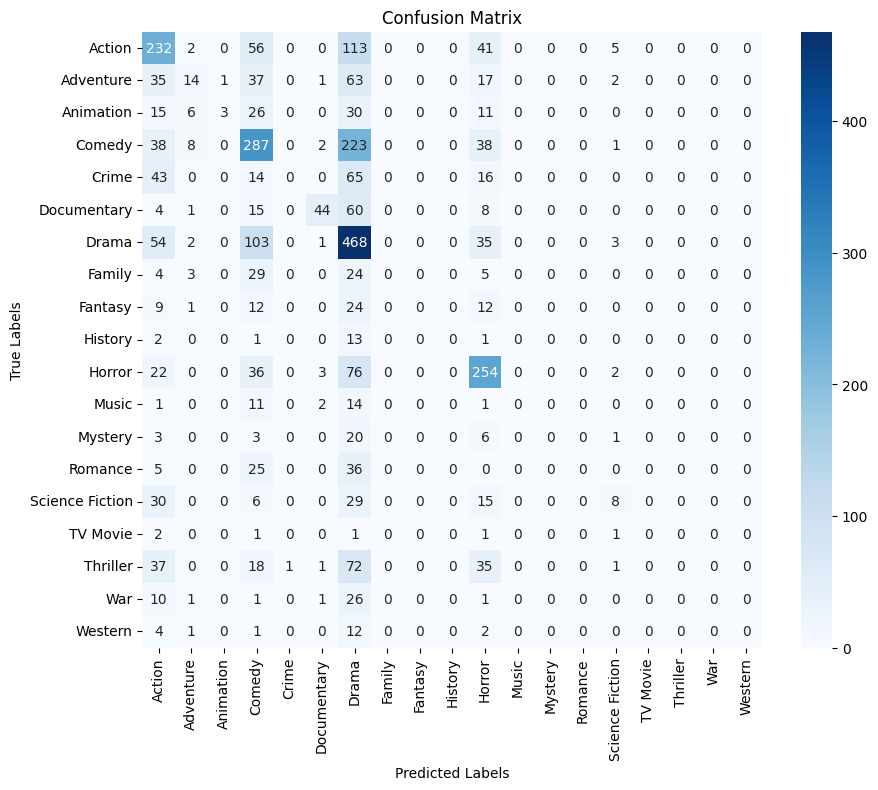

In [20]:
# rerun random forest
model_forest = RandomForestClassifier(n_estimators=400, random_state=42, max_depth=100)
model_forest.fit(X_train_filtered, y_train_encoded)

y_pred_encoded = model_forest.predict(X_test_filtered)
y_pred_training = model_forest.predict(X_train_filtered)
print("test accuracy:", accuracy_score(y_train_encoded, y_pred_training))

# decode the predicted labels back to original genre labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# metrics, added zero_division =1 for classes with no predictions/data in test set
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)
recall = recall_score(y_test, y_pred, average='weighted')
print("recall:", recall)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
print("precision:", precision)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
print("f1 score:", f1)
error_rate = 1 - accuracy
print("error rate:", error_rate)


conf_matrix = confusion_matrix(y_test, y_pred)

# display confusion matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


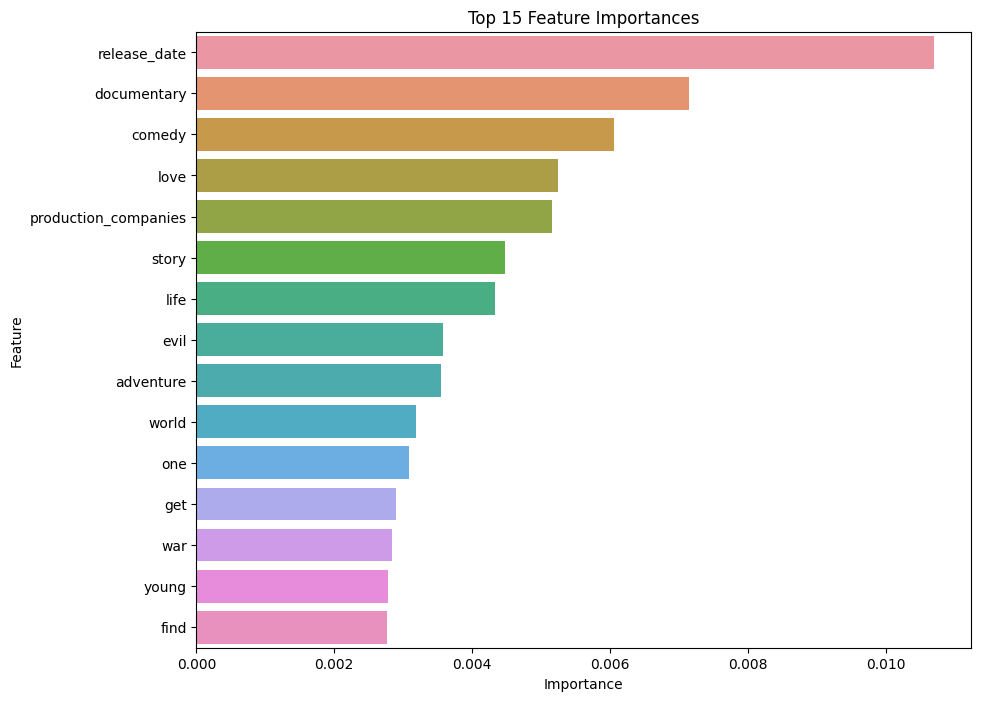

In [15]:
# plotting feature importances
feature_importances = model_forest.feature_importances_

# names of features
feature_names = X_train_filtered.columns.tolist() 

# dataframe to hold feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# sort the dataframe by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))  
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances')
plt.show()

# Adaboost

predictions made on: 100 estimators 5 max_depth
predictions made on: 200 estimators 5 max_depth
predictions made on: 300 estimators 5 max_depth
predictions made on: 100 estimators 10 max_depth
predictions made on: 200 estimators 10 max_depth
predictions made on: 300 estimators 10 max_depth
predictions made on: 100 estimators 20 max_depth
predictions made on: 200 estimators 20 max_depth
predictions made on: 300 estimators 20 max_depth
predictions made on: 100 estimators 30 max_depth
predictions made on: 200 estimators 30 max_depth
predictions made on: 300 estimators 30 max_depth


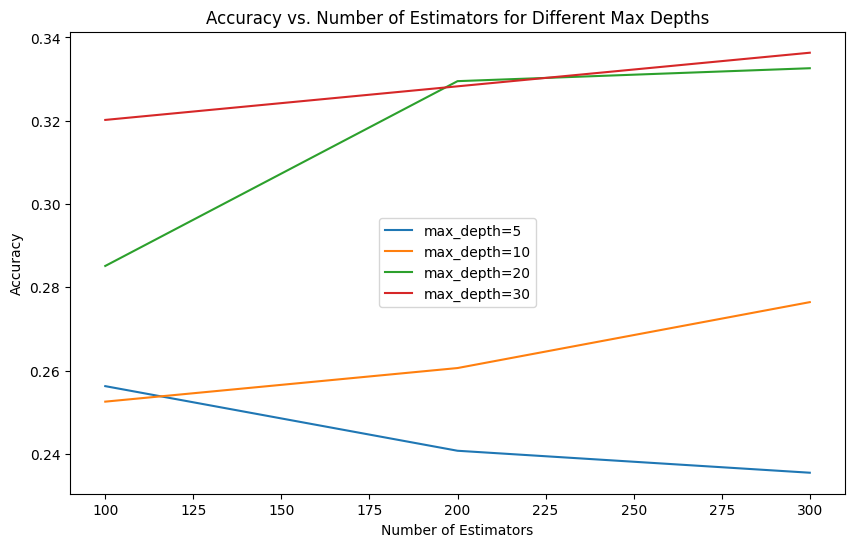

In [19]:
# testing max depths & number of estimators
max_depth_values = [5, 10, 20, 30]
n_estimators_values = [100, 200, 300]

accuracy_scores = []

for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        # base estimator & adaboost
        dt = DecisionTreeClassifier(max_depth=max_depth)
        model_ada = AdaBoostClassifier(base_estimator=dt, n_estimators=n_estimators, random_state=42)
        
        # fit model
        model_ada.fit(X_train_filtered, y_train_encoded)
        
        # predict on the test data
        y_pred = model_ada.predict(X_test_filtered)
        
        # added a print statement to see what's running
        print('predictions made on:', n_estimators, 'estimators', max_depth, 'max_depth')
        
        # store accuracy
        accuracy = accuracy_score(y_test_encoded, y_pred)
        accuracy_scores.append((max_depth, n_estimators, accuracy))

# converting to numpy for easier graphing
accuracy_scores = np.array(accuracy_scores)

# results
plt.figure(figsize=(10, 6))
for max_depth in max_depth_values:
    mask = accuracy_scores[:, 0] == max_depth
    plt.plot(accuracy_scores[mask, 1], accuracy_scores[mask, 2], label=f"max_depth={max_depth}")

plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Estimators for Different Max Depths')
plt.legend()
plt.show()

In [22]:
# rerun on best model
dt = DecisionTreeClassifier(max_depth=30)
model_ada = AdaBoostClassifier(base_estimator=dt, n_estimators=300, random_state=42)
        
# fit model
model_ada.fit(X_train_filtered, y_train_encoded)

C:\Users\Brady\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=200, random_state=42)

training accuracy: 0.40730395199668945
accuracy: 0.25038783741855414
recall: 0.25038783741855414
precision: 0.22277074456151277
f1 score: 0.26883876345904717
error rate: 0.7496121625814458


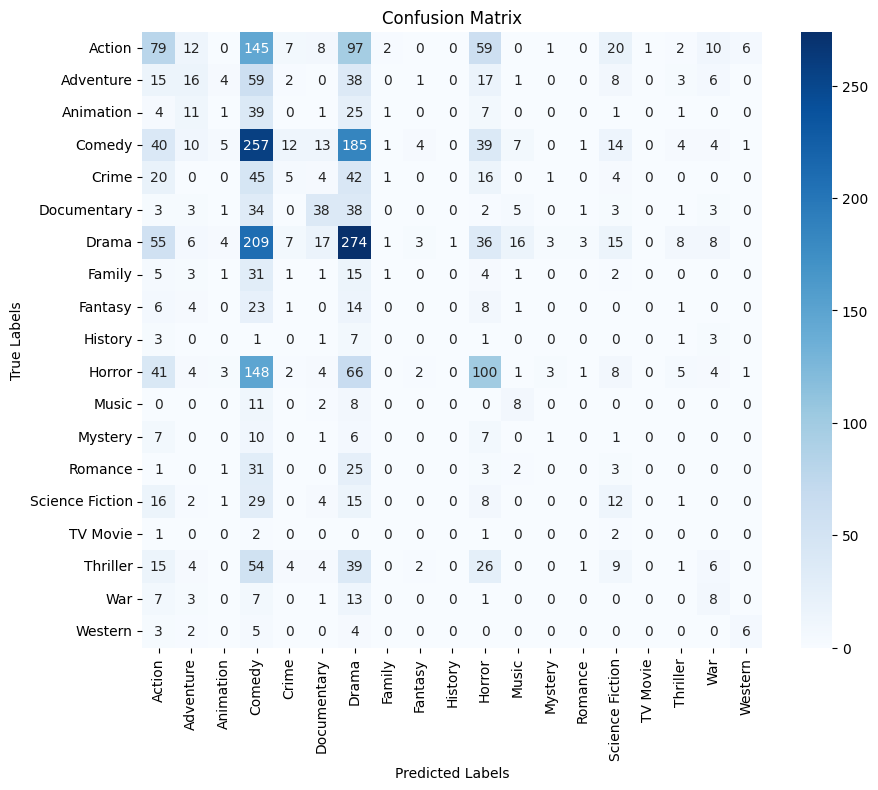

In [23]:
# predict on the test data
y_pred_encoded = model_ada.predict(X_test_filtered)
# Decode the predicted labels back to original genre labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)
y_training = model_ada.predict(X_train_filtered)
print("training accuracy:", accuracy_score(y_train_encoded, y_training))

# metrics
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)
recall = recall_score(y_test, y_pred, average='weighted')
print("recall:", recall)

# added zero_division =1 for classes with no predictions/data in test set
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
print("precision:", precision)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
print("f1 score:", f1)
error_rate = 1 - accuracy
print("error rate:", error_rate)


conf_matrix = confusion_matrix(y_test, y_pred)

# display confusion matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


/Users/sarakent/opt/miniconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:666: RuntimeWarning: invalid value encountered in divide
  return self.tree_.compute_feature_importances()


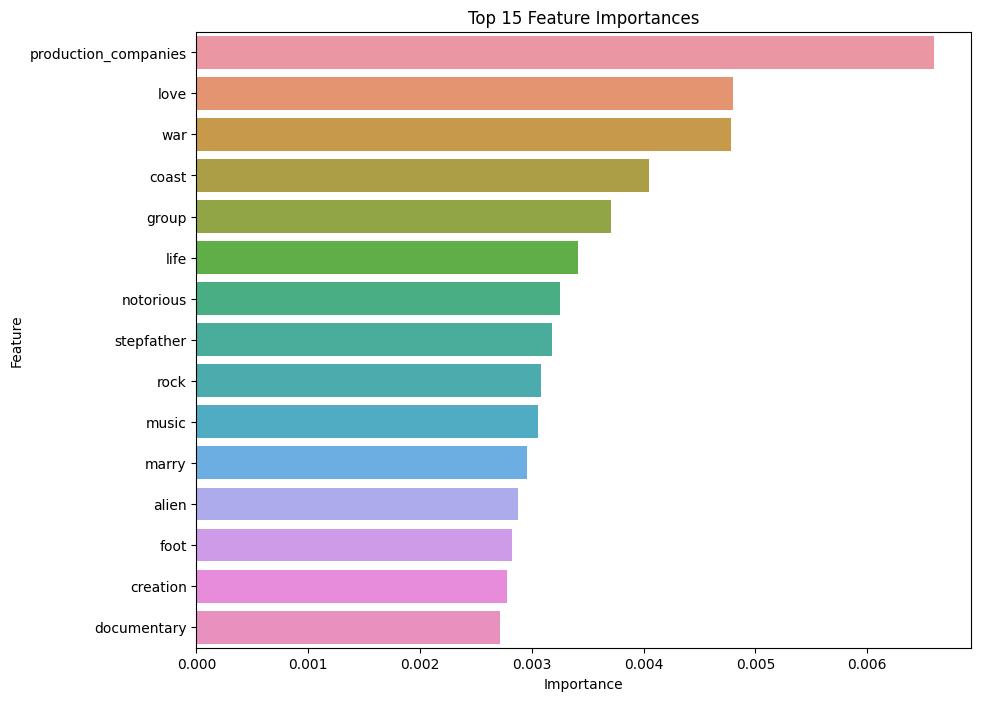

In [29]:
feature_importances = model_ada.feature_importances_
# names of features
feature_names = X_train_filtered.columns.tolist() 

# dataframe to hold feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# sort the dataframe by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))  
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances')
plt.show()

# Logistic Regression

metrics for C = 0.1:
accuracy: 0.44865032578343156
precision: 0.43334550394119364
recall: 0.44865032578343156
f1: 0.4036316614709321
error: 0.5513496742165684


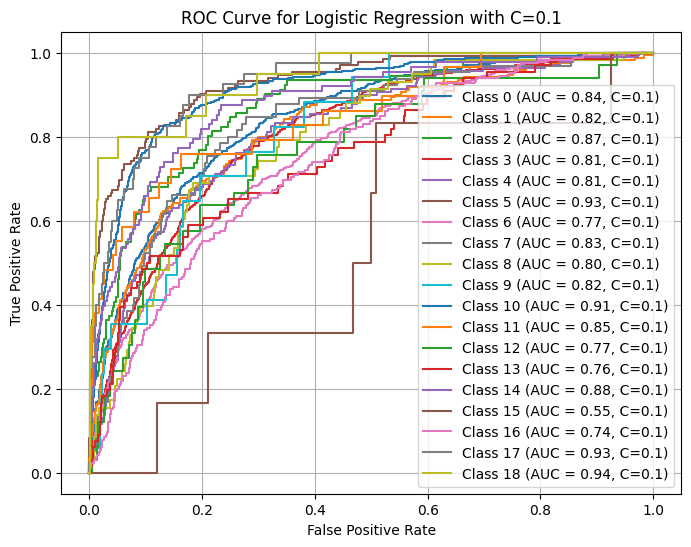

In [15]:
# initialize list of C values to try
C_values = [0.1]
plt.figure(figsize=(8, 6))

for C in C_values:
    # logistic regression classifier
    lr = LogisticRegression(C=C, multi_class='ovr', max_iter=1000, random_state=42)
    
    # fit the model
    lr.fit(X_train_filtered, y_train_encoded)
    
    # predict probabilities on the test data
    y_proba = lr.predict_proba(X_test_filtered)

    # calculate n_classes
    n_classes = len(np.unique(y_train_encoded))
    
    # print metrics
    y_pred = lr.predict(X_test_filtered)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='weighted',zero_division=1)
    recall = recall_score(y_test_encoded, y_pred, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    error = 1 - accuracy
    print(f'metrics for C = {C}:')
    print('accuracy:', accuracy)
    print('precision:', precision)
    print('recall:', recall)
    print('f1:', f1)
    print('error:', error)
    
    
    # compute ROC curve and ROC AUC score for each class
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_encoded == i, y_proba[:, i])
        roc_auc = auc(fpr, tpr)
        
        # plot ROC curve for each class
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f}, C={C})")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression with C=0.1')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# find training accuracy
y_training = lr.predict(X_train_filtered)
print("training accuracy:", accuracy_score(y_train_encoded, y_training))

training accuracy: 0.7041175253465757


# Naive Bayes

predictions made with alpha: 0.1
predictions made with alpha: 0.5
predictions made with alpha: 1.0
predictions made with alpha: 2.0


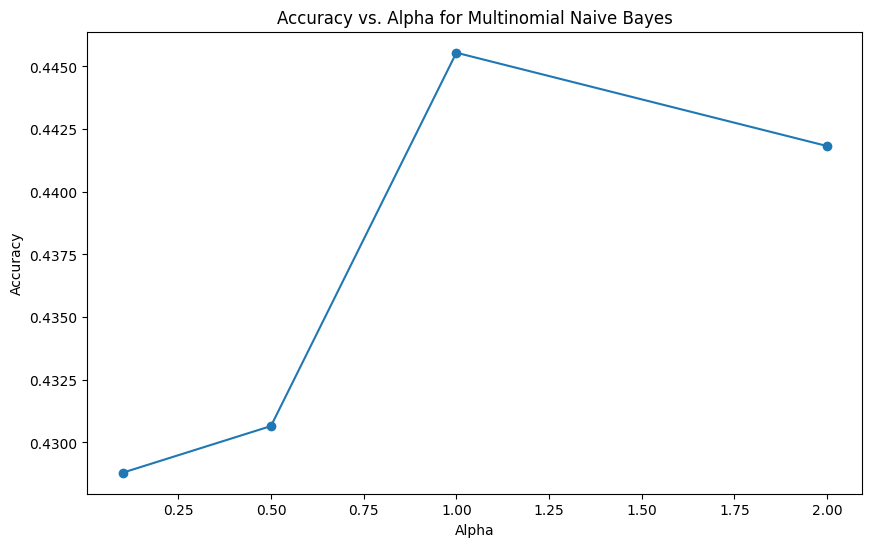

In [19]:
alpha_values = [0.1, 0.5, 1.0, 2.0]

accuracy_scores = []

for alpha in alpha_values:
    # Multinomial Naive Bayes classifier
    model_NB = MultinomialNB(alpha=alpha)
    
    # fit model
    model_NB.fit(X_train_filtered, y_train_encoded)
    
    # predict on the test data
    y_pred = model_NB.predict(X_test_filtered)
    
    # store accuracy
    accuracy = accuracy_score(y_test_encoded, y_pred)
    accuracy_scores.append((alpha, accuracy))

# converting to numpy for easier graphing
accuracy_scores = np.array(accuracy_scores)

# results
plt.figure(figsize=(10, 6))
plt.plot(accuracy_scores[:, 0], accuracy_scores[:, 1], marker='o')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Alpha for Multinomial Naive Bayes')
plt.show()

In [20]:
print('metrics on Multinomial Naive Bayes w/ best Alpha')

# rerun model
model_NB = MultinomialNB(alpha=1.0)
    
# fit model
model_NB.fit(X_train_filtered, y_train_encoded)

# predict on the test data
y_pred = model_NB.predict(X_test_filtered)
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')
error = 1 - accuracy

print(f'metrics for alpha = 1:')
print('accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)
print('error:', error)

# find training accuracy
y_training = model_NB.predict(X_train_filtered)
print("training accuracy:", accuracy_score(y_train_encoded, y_training))


metrics on Multinomial Naive Bayes w/ best Alpha
metrics for alpha = 1:
accuracy: 0.44554762643499846
precision: 0.41563974366636575
recall: 0.44554762643499846
f1: 0.4169591037903804
error: 0.5544523735650015
training accuracy: 0.6818746120422098
